# 🔎 Data Exploration

To have a good understanding of the underlying dataset, and set up for train/validation/test splits some data exploration is necessary.

In [2]:
import os
import pandas as pd
import numpy as np
import shutil

from src import utils

## 1. Data Overview

In [2]:
# Get an overview of the videos from the original annotation files

file_names, empty_frames, frames = utils.label_data.frame_overview(os.path.join(utils.RAW_DATA_DIR, 'drone_vs_bird_competition'))

empty_frames = np.array(empty_frames)
frames = np.array(frames)
empty_ratio = np.divide(empty_frames, frames)

# Combine the data into a DataFrame
overview_df = pd.DataFrame({
    'file_name': file_names,
    'empty_frames': empty_frames,
    'total_frames': frames,
    'empty_ratio': empty_ratio
})

# Save the dataframe to the metadata folder
overview_df.to_csv(os.path.join(utils.METADATA_DIR, 'dvb_video_overview.csv'), index=False)

In [2]:
# Re-read the csv to a dataframe (so the previous step can be skipped in the future)
overview_df = pd.read_csv(os.path.join(utils.METADATA_DIR, 'dvb_video_overview.csv'))

In [3]:
# Display the overview dataframe
overview_df.head()

,file_name,empty_frames,total_frames,empty_ratio
0,00_01_52_to_00_01_58.txt,53,175,0.302857
1,00_02_45_to_00_03_10_cut.txt,1,400,0.002500
2,00_06_10_to_00_06_27.txt,272,499,0.545090
3,00_09_30_to_00_10_09.txt,80,1165,0.068670
4,00_10_09_to_00_10_40.txt,31,925,0.033514


In [4]:
# Describe the overview dataframe
overview_df.describe()

,empty_frames,total_frames,empty_ratio
count,77.000000,77.000000,77.000000
mean,118.000000,1382.922078,0.086012
std,203.845788,1062.066144,0.122985
min,0.000000,175.000000,0.000000
25%,3.000000,526.000000,0.003506
50%,40.000000,925.000000,0.046698
75%,132.000000,1576.000000,0.101498
max,1103.000000,4612.000000,0.735333


In [5]:
print(f"Total number of frames: {overview_df['total_frames'].sum()}")
print(f"Total number of empty frames: {overview_df['empty_frames'].sum()}")

Total number of frames: 106485
Total number of empty frames: 9086


From the description statistics we can see that we have a total of 106,485 images, so for a test dataset of 10% we would ideally have around 10,648 images. These images must come from the same videos so there is no data leakage between the training and testing sets.

We can also see that there is an average of about 8% empty frames (frames with no annotated objects) which would be useful to match for the testing set, but having a higher percentage in the test set may be acceptable to have a better measure of false-positive results from the final test. However, having some sparsely populated images is helpful to have in the training set as well.

In [ ]:
# Check the extracted images to see if any are blank (all black)

black_images = []

image_list = utils.files.get_image_files(os.path.join(utils.INTERIM_DATA_DIR, 'drone_vs_bird_data'))

# Check each image to see if it is black
for image in image_list:
    if utils.image_data.is_blank_image(image):
        black_images.append(image)

In [4]:
# Create a dataframe from the list of black images
black_images_df = pd.DataFrame(black_images, columns=['file_name'])

# Save the dataframe to the metadata folder
black_images_df.to_csv(os.path.join(utils.METADATA_DIR, 'dvb_black_images.csv'), index=False)

In [4]:
# Re-read the dataframe from the csv file
black_images_df = pd.read_csv(os.path.join(utils.METADATA_DIR, 'dvb_black_images.csv'))

In [5]:
# Print the full list of black images
black_images_df

,file_name
0,data\interim\drone_vs_bird_data\distant_parrot...
1,data\interim\drone_vs_bird_data\distant_parrot...
2,data\interim\drone_vs_bird_data\dji_mavick_hil...
3,data\interim\drone_vs_bird_data\dji_mavick_mou...
4,data\interim\drone_vs_bird_data\dji_phantom_4_...
5,data\interim\drone_vs_bird_data\dji_phantom_4_...
6,data\interim\drone_vs_bird_data\dji_phantom_4_...
7,data\interim\drone_vs_bird_data\dji_phantom_mo...
8,data\interim\drone_vs_bird_data\fixed_wing_ove...
9,data\interim\drone_vs_bird_data\fixed_wing_ove...


These completely blank images won't provide any specific benefit to the model, so they should be excluded.

In [2]:
# Collect a list of the video files
video_files = utils.files.get_video_files(os.path.join(utils.RAW_DATA_DIR, 'drone_vs_bird_competition'))

In [3]:
# Get the video resolutions for each video
vid_widths = []
vid_heights = []
for video_file in video_files:
    width, height = utils.video_data.get_resolution(video_file, os.path.join(utils.RAW_DATA_DIR, 'drone_vs_bird_competition'))
    vid_widths.append(width)
    vid_heights.append(height)

In [4]:
# Get the video durations for each video
vid_durations = []
for video_file in video_files:
    duration = utils.video_data.get_duration(video_file, os.path.join(utils.RAW_DATA_DIR, 'drone_vs_bird_competition'))
    vid_durations.append(duration)

In [8]:
# Save metadata
video_info = {
    "file": video_files,
    "width": vid_widths,
    "height": vid_heights,
    "duration": vid_durations
}

video_info_df = pd.DataFrame(video_info)
video_info_df.to_csv(os.path.join(utils.METADATA_DIR, 'video_info.csv'), index=False)

In [9]:
# Re-read the dataframe from the csv
video_info_df = pd.read_csv(os.path.join(utils.METADATA_DIR, 'video_info.csv'))

In [10]:
video_info_df

,file,width,height,duration
0,00_01_52_to_00_01_58.mp4,1920,1080,5
1,00_02_45_to_00_03_10_cut.mpg,1920,1080,7
2,00_06_10_to_00_06_27.mp4,1920,1080,16
3,00_09_30_to_00_10_09.mp4,1920,1080,38
4,00_10_09_to_00_10_40.mp4,1920,1080,30
...,...,...,...,...
72,swarm_dji_phantom.avi,720,576,78
73,swarm_dji_phantom4_2.avi,720,576,60
74,two_distant_phantom.avi,1280,720,59
75,two_parrot_disco_1.avi,720,576,70


In [11]:
video_info_df.describe()

,width,height,duration
count,77.000000,77.000000,77.000000
mean,1924.155844,1108.987013,48.584416
std,787.897520,404.648857,43.549231
min,720.000000,576.000000,5.000000
25%,1920.000000,1080.000000,19.000000
50%,1920.000000,1080.000000,45.000000
75%,1920.000000,1080.000000,60.000000
max,3840.000000,2160.000000,329.000000


Some basic observations of the video information shows that most of them 1920x1080, with an average length of 48 seconds (median is 45). The largest resolutions are 3840x2160 which may prove problematic for training due to their size.

## 2. Video Investigation

Creating videos from the separated images with the annotation bounding boxes added onto them helps to verify that the process up to this point has worked correctly and that the annotations match the images without having to search through each of them individually. Rather than simply applying the bounding boxes to the raw data videos this ensures that the functions to translate the annotations worked correctly.

In [13]:
# Get list of the video files
video_files = utils.files.get_video_files(os.path.join(utils.RAW_DATA_DIR, 'drone_vs_bird_competition'))

In [14]:
# Get list of the image files
image_files = utils.files.get_image_files(os.path.join(utils.INTERIM_DATA_DIR, 'drone_vs_bird_data'))

In [ ]:
# Loop through the video files
for video_file in video_files:
    # Get video information
    video_width, video_height = utils.video_data.get_resolution(video_file, utils.RAW_DATA_DIR)
    
    # Get base name of the video
    base_name = os.path.splitext(video_file)[0]

    # Filter the list of images down to just those that correspond to the current video
    video_images = [img for img in image_files if base_name in img]
    
    # Get the corresponding list of annotation files
    ann_files = [os.path.splitext(img)[0] + ".txt" for img in video_images]
    
    # Create empty list for the processed images
    processed_images = []

    for img, ann in zip(video_images, ann_files):
        # Get the image dimensions
        img_width, img_height = utils.image_data.get_image_size(img, utils.INTERIM_DATA_DIR)
        
        # Get the bounding boxes
        bboxes = utils.label_data.read_bbox_file(ann)
        
        # Draw the bounding boxes on the image
        img_with_bboxes = utils.image_data.draw_bbox(img, bboxes)
        
        # Save the image to the list
        processed_images.append(img_with_bboxes)
        
    # Combine the processed images into a video
    output_path = os.path.join(utils.RAW_DATA_DIR, 'drone_vs_bird_annotated_vids', f"{base_name}_annotated.mp4")
    utils.video_data.create_video(processed_images, video_width, video_height, output_path)

Watching the new videos showed two errors. One was minor, while the other was a significant error:

File `2019_10_16_C0003_3633_inspire` had significant bounding box problems, it was rarely overlapping the object at all. Watching the video showed that what was happening was that the bounding box was lagging behind the actual object. Upon inspection the raw data annotation file had more frames listed than there were frames in the video. Since it appears to be lagging significantly it's estimated to be offset by the amount of "extra" frame annotations at the end of the annotation file which will need to be corrected.

The minor error involved some bounding box issues at the tail end of video file `00_10_09_to_00_10_40` where the box was shrinking as the object moved to the top right corner of the video.

## 3. Annotation Data Exploration

In [3]:
# Get list of the annotation files
annotation_files = utils.files.get_annotation_files(os.path.join(utils.INTERIM_DATA_DIR, 'drone_vs_bird_data'))

In [14]:
os.path.splitext(os.path.basename(annotation_files[0]))[0][-4:]

'0000'

In [17]:
# Collect annotation data

# Create a blank dataframe to hold the data
annotations_df = pd.DataFrame(columns=['video_id', 'frame', 'label', 'x_center', 'y_center', 'width', 'height', 'area'])

# Loop through the annotation files to collect data
for ann_file in annotation_files:
    file_name = os.path.splitext(os.path.basename(ann_file))[0]
    base_name = file_name[:-11]  # Remove the '_frame_xxxx' part to get the original video base name
    frame = int(file_name[-4:])  # Get the frame number
    
    bboxes = utils.label_data.read_bbox_file(ann_file)

    for bbox in bboxes:
        # Get the info from the bbox
        bbox_info = utils.label_data.bbox_info(bbox)
        # Append the info to the dataframe
        bbox_df = pd.DataFrame({
            'video_id': base_name,
            'frame': frame,
            'label': bbox_info['label'],
            'x_center': bbox_info['x_center'],
            'y_center': bbox_info['y_center'],
            'width': bbox_info['width'],
            'height': bbox_info['height'],
            'area': bbox_info['area']
        }, index=[0])
        annotations_df = pd.concat([annotations_df, bbox_df], ignore_index=True)


C:\Users\keyan\AppData\Local\Temp\ipykernel_17312\2442981382.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  annotations_df = pd.concat([annotations_df, bbox_df], ignore_index=True)


In [18]:
annotations_df.head()

,video_id,frame,label,x_center,y_center,width,height,area
0,00_01_52_to_00_01_58,34,0.0,0.014844,0.243056,0.028646,0.039815,0.001141
1,00_01_52_to_00_01_58,35,0.0,0.020052,0.240278,0.028646,0.039815,0.001141
2,00_01_52_to_00_01_58,36,0.0,0.027865,0.245833,0.028646,0.039815,0.001141
3,00_01_52_to_00_01_58,37,0.0,0.034635,0.242593,0.034896,0.042593,0.001486
4,00_01_52_to_00_01_58,38,0.0,0.042969,0.243519,0.034896,0.042593,0.001486


In [19]:
# Save the dataframe
annotations_df.to_csv(os.path.join(utils.METADATA_DIR, 'annotations_data.csv'), index=False)

In [20]:
# Re-read the csv into a dataframe
annotations_df = pd.read_csv(os.path.join(utils.METADATA_DIR, 'annotations_data.csv'))

In [21]:
# Get some basic statistics
annotations_df.describe()

,frame,label,x_center,y_center,width,height,area
count,119235.000000,119235.0,119235.000000,119235.000000,119235.000000,119235.000000,119235.000000
mean,1203.311922,0.0,0.486042,0.499332,0.026569,0.027595,0.001395
std,974.327432,0.0,0.183553,0.206858,0.027811,0.026172,0.006417
min,0.000000,0.0,-0.004687,-0.005208,0.002083,0.002778,0.000007
25%,395.000000,0.0,0.366667,0.355903,0.013542,0.016204,0.000221
50%,942.000000,0.0,0.484722,0.499132,0.019444,0.020833,0.000405
75%,1833.000000,0.0,0.601562,0.649537,0.031944,0.031250,0.000928
max,4569.000000,0.0,0.999609,1.006076,0.365365,0.464815,0.168132


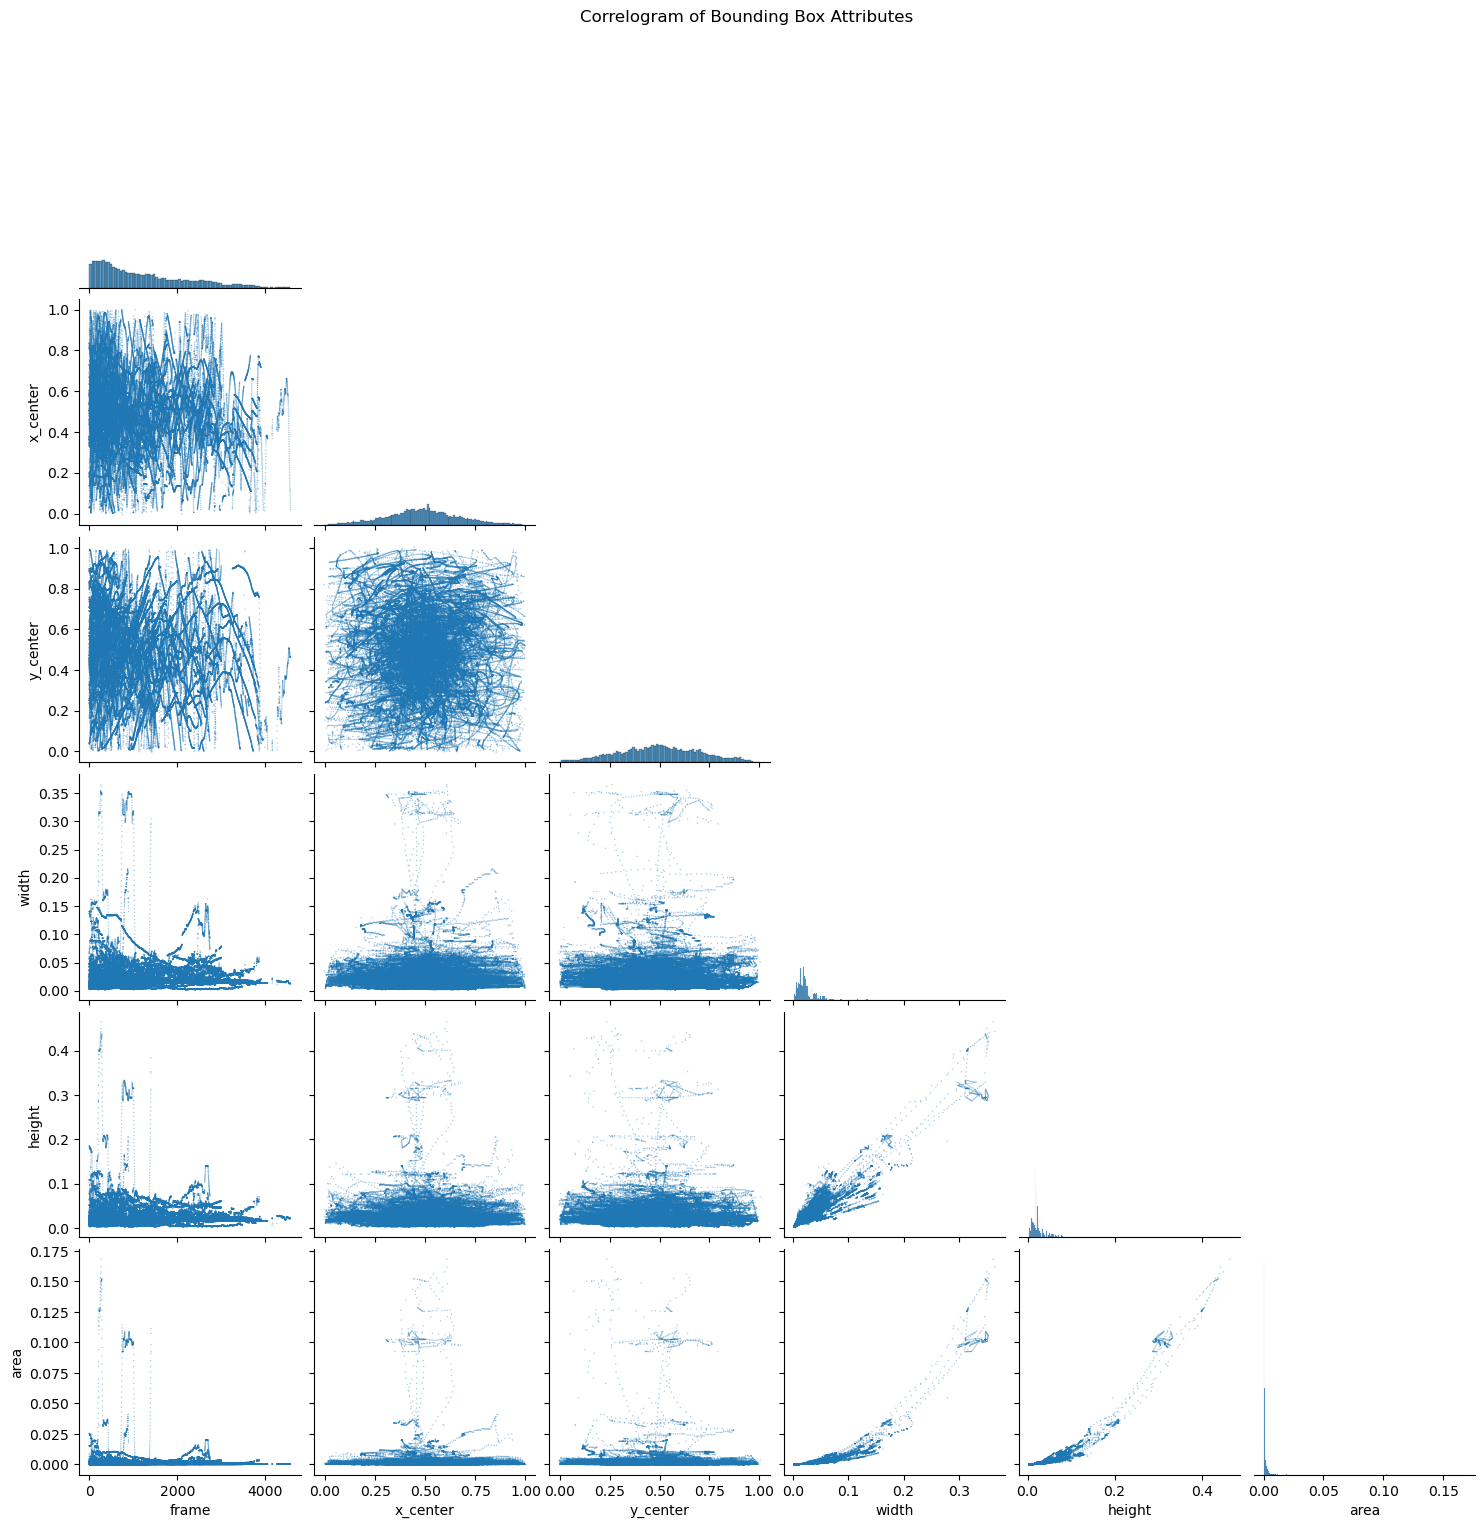

In [33]:
# Create a correlogram/pairplot chart of the data

import matplotlib.pyplot as plt
import seaborn as sns

# Create the base pairplot
g =sns.pairplot(
    data=annotations_df[['frame', 'x_center', 'y_center', 'width', 'height', 'area']],
    markers='.',
    corner=True,
    plot_kws=dict(edgecolor="none",
                  s=4,
                  alpha=0.4)
    )
# Set the title of the figure
g.figure.suptitle('Correlogram of Bounding Box Attributes', y=1.02)
# Save the figure to the metadata folder
g.savefig(os.path.join(utils.METADATA_DIR, 'annotations_correlogram.png'), dpi=300, bbox_inches='tight')
# Display in-line
g

## 3. Saving Resulting Data

In [10]:
# If the image contains the test file name move it from the list to a new list
test_images = [img for img in image_list if utils.files.file_contains_name(img, test_files)]
training_images = [img for img in image_list if img not in test_images]

In [11]:
# Do the same, splitting training into training and validation
val_images = [img for img in training_images if utils.files.file_contains_name(img, val_files)]
training_images = [img for img in training_images if img not in val_images]

In [12]:
# Check list sizes

print(f"Total number of test images: {len(test_images)}")
print(f"Total number of validation images: {len(val_images)}")
print(f"Total number of training images: {len(training_images)}")

Total number of test images: 10725
Total number of validation images: 10723
Total number of training images: 84995


In [13]:
# Duplicate the lists for the annotation files

test_annotations = test_images.copy()
val_annotations = val_images.copy()
training_annotations = training_images.copy()

# Change file extensions for each line to .txt
test_annotations = [os.path.splitext(ann)[0] + '.txt' for ann in test_annotations]
val_annotations = [os.path.splitext(ann)[0] + '.txt' for ann in val_annotations]
training_annotations = [os.path.splitext(ann)[0] + '.txt' for ann in training_annotations]

In [14]:
# Set random seed for reproducibility
rng = np.random.default_rng(42)

# Get a random number in the range of the test set
random_test_index = rng.integers(0, len(test_images))

# Get a random number in the range of the validation set
random_validation_index = rng.integers(0, len(val_images))

# Get a random number in the range of the training set
random_training_index = rng.integers(0, len(training_images))

# Ensure that the test index gives matching image and annotations
print(f"Test image: {test_images[random_test_index]}")
print(f"Test annotation: {test_annotations[random_test_index]}")

# Ensure that the validation index gives matching image and annotations
print(f"Validation image: {val_images[random_validation_index]}")
print(f"Validation annotation: {val_annotations[random_validation_index]}")

# Ensure that the training index gives matching image and annotations
print(f"Training image: {training_images[random_training_index]}")
print(f"Training annotation: {training_annotations[random_training_index]}")


Test image: data\interim\drone_vs_bird_data\dji_matrice_210_off_focus_frame_0232.png
Test annotation: data\interim\drone_vs_bird_data\dji_matrice_210_off_focus_frame_0232.txt
Validation image: data\interim\drone_vs_bird_data\GOPR5844_002_frame_0466.png
Validation annotation: data\interim\drone_vs_bird_data\GOPR5844_002_frame_0466.txt
Training image: data\interim\drone_vs_bird_data\matrice_600_3_frame_1949.png
Training annotation: data\interim\drone_vs_bird_data\matrice_600_3_frame_1949.txt


In [16]:
# Test folder
testing_folder = os.path.join(utils.INTERIM_DATA_DIR, "drone_vs_bird_shrunk", "test")

# Copy the test annotations and images to the testing folder
for img, ann in zip(test_images, test_annotations):
    shutil.copy(img, os.path.join(testing_folder, "images", os.path.basename(img)))
    shutil.copy(ann, os.path.join(testing_folder, "labels", os.path.basename(ann)))


In [17]:
# Validation folder
val_folder = os.path.join(utils.INTERIM_DATA_DIR, "drone_vs_bird_shrunk", "val")

# Copy the validation annotations and images to the validation folder
for img, ann in zip(val_images, val_annotations):
    shutil.copy(img, os.path.join(val_folder, "images", os.path.basename(img)))
    shutil.copy(ann, os.path.join(val_folder, "labels", os.path.basename(ann)))

In [18]:
# Training folder
training_folder = os.path.join(utils.INTERIM_DATA_DIR, "drone_vs_bird_shrunk", "train")

# Copy the training annotations and images to the training folder
for img, ann in zip(training_images, training_annotations):
    shutil.copy(img, os.path.join(training_folder, "images", os.path.basename(img)))
    shutil.copy(ann, os.path.join(training_folder, "labels", os.path.basename(ann)))


In [19]:
# Get a list of each image file in the training, validation, and testing folders
training_folder = os.path.join(utils.INTERIM_DATA_DIR, "drone_vs_bird_shrunk", "train", "images")
val_folder = os.path.join(utils.INTERIM_DATA_DIR, "drone_vs_bird_shrunk", "val", "images")
testing_folder = os.path.join(utils.INTERIM_DATA_DIR, "drone_vs_bird_shrunk", "test", "images")

train_images = utils.image_data.get_image_files(training_folder)
val_images = utils.image_data.get_image_files(val_folder)
test_images = utils.image_data.get_image_files(testing_folder)


In [20]:
# Set max image size
max_image_size = (640, 640)


In [22]:
# For all images in the training folder apply the scale_image_down function
for img in train_images:
    utils.image_data.scale_image_down(img, max_image_size)
# For all images in the validation folder apply the scale_image_down function
for img in val_images:
    utils.image_data.scale_image_down(img, max_image_size)

In [4]:
# For all images in the validation folder apply the scale_image_down function
for img in val_images:
    utils.image_data.scale_image_down(img, max_image_size)


In [21]:
# For all images in the test folder apply the scale_image_down function
for img in test_images:
    utils.image_data.scale_image_down(img, max_image_size)
